In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

# Data Cleaning, organizing data, Handling Outliers - creating DataSet

In [2]:
def load_file(file_name):
    df = pd.read_csv(file_name)
    return df
    
def remove_empty_rows(df):
    return df.dropna(axis=0,thresh=17)

def rename_columns(df):
    df2=df.rename(columns={'G':'games','GS':'gameStarted','MP':'minPlayed',
                                'FG':'fieldGoals','FGA':'fieldGoalsAttemp',
                                'FG%':'fieldGoalsPerc','P2':'point2_Goals','2PA':'point2_Attemp',
                                '2P%':'point2_Perc','3P':'point3_Goals','3PA':'point3_Attemp','3P%':'point3_Perc','FT':'freeThrows','FTA':'freeThrowsAttemp',
                                'FT%':'freeThrowsPerc','ORB':'offensRebounds','DRB':'deffensRebounds'})
    return df2



#### 1) Uniting our dataframes into one main dataframe. 
#### 2) Sorting the dataframe by name, removing dupliactes and null rows

In [3]:
df_A = load_file('data\Dataframe_A.csv')
df_B = load_file('data\Dataframe_B.csv')
df_C = load_file('data\Dataframe_C.csv')
df_H = load_file('data\Dataframe_H.csv')
df_M = load_file('data\Dataframe_M.csv')
df_W = load_file('data\Dataframe_W.csv')
df_Z = load_file('data\Dataframe_Z.csv')

frames = [df_A, df_B, df_C,df_H,df_M,df_W,df_Z]

df = pd.concat(frames)
df=remove_empty_rows(df)
df=rename_columns(df)
df=df.sort_values(by=['name'])
df=df.reset_index(drop=True)
df=df.drop_duplicates(subset=['name'],ignore_index=True)
df.shape

(15388, 18)

#### Uniting our dataframe with NBA draft-picks statistics. 

In [4]:
# load nba drafts statistics
df_nb = load_file('data\Dataframe_NBA_Correct.csv')
df_nba=df_nb.rename(columns={'Name':'name','DraftPick':'draft'})

# merge players stats with draft stats
my_dataset = pd.merge(df,df_nba,on='name',how='left')

# changing our draft column to "1" if the player was picked on first draft, "0" otherwise.
my_dataset['draft'] = my_dataset['draft'].replace(np.nan, 0)
my_dataset['deffensRebounds'] = my_dataset['deffensRebounds'].replace(np.nan, 0)
my_dataset['draft'] = my_dataset['draft'].map(lambda val:1 if val == 1 else 0)
my_dataset.to_csv(r'C:\Users\vikvi\0_FINAL\data\check.csv',index=False)


In [5]:
df = pd.read_csv('data/check.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15417 entries, 0 to 15416
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15417 non-null  object 
 1   games             15417 non-null  float64
 2   gameStarted       15413 non-null  float64
 3   minPlayed         15238 non-null  float64
 4   fieldGoals        15417 non-null  float64
 5   fieldGoalsAttemp  15417 non-null  float64
 6   fieldGoalsPerc    15417 non-null  float64
 7   point2_Goals      15417 non-null  float64
 8   point2_Attemp     15417 non-null  float64
 9   point2_Perc       15323 non-null  float64
 10  point3_Goals      15417 non-null  float64
 11  point3_Attemp     15417 non-null  float64
 12  point3_Perc       13687 non-null  float64
 13  freeThrows        15417 non-null  float64
 14  freeThrowsAttemp  15417 non-null  float64
 15  freeThrowsPerc    14795 non-null  float64
 16  offensRebounds    15417 non-null  float6

#### Now, we will handle with outliers

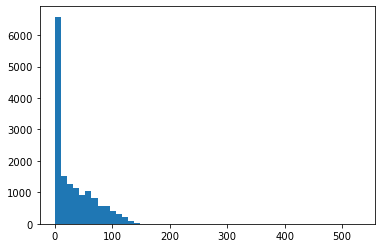

In [6]:
df.gameStarted.describe()
plt.hist(df.gameStarted, bins=50)
plt.xlabel=("gameStarted")
plt.ylabel=("Frequency")

## check outliers of point2,point3 and free throws percantages
### We can see that point2 percent is ok. So we will fix only the point3 outlier.

count    15323.000000
mean         0.458312
std          0.149988
min          0.000000
25%          0.406000
50%          0.469000
75%          0.523000
max          1.000000
Name: point2_Perc, dtype: float64

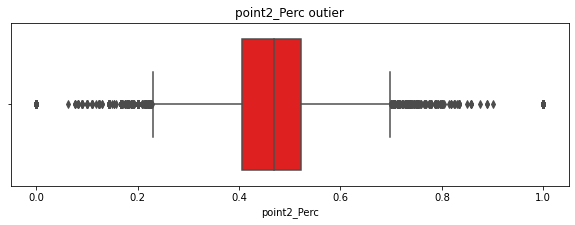

In [7]:


plt.figure(figsize=(10,3))
plt.title('point2_Perc outier')
sns.boxplot(x=df.point2_Perc, color='red')
df.point2_Perc.describe()


count    13687.000000
mean         0.285207
std          0.167669
min          0.000000
25%          0.222000
50%          0.314000
75%          0.362000
max          2.000000
Name: point3_Perc, dtype: float64

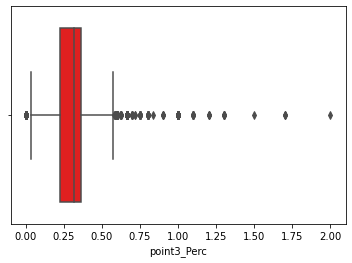

In [8]:
sns.boxplot(x=df.point3_Perc, color='red')
df.point3_Perc.describe()

count    14795.000000
mean         0.660234
std          0.229010
min          0.000000
25%          0.571000
50%          0.675000
75%          0.754000
max          7.000000
Name: freeThrowsPerc, dtype: float64

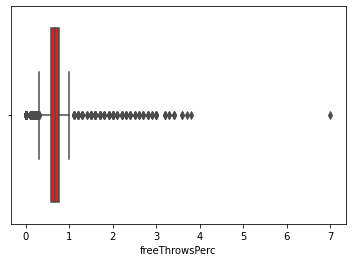

In [9]:
sns.boxplot(x=df.freeThrowsPerc, color='red')
df.freeThrowsPerc.describe()

### We can see that there's an outlier in free throws percentage and 3 point percentage, so we will fix it.

In [10]:
median = df.loc[df['freeThrowsPerc']<1.00, 'freeThrowsPerc'].median()
df.loc[df.freeThrowsPerc > 1.00, 'freeThrowsPerc'] = np.nan
df.fillna(median,inplace=True)
df.freeThrowsPerc.describe()

count    15417.000000
mean         0.649115
std          0.168472
min          0.000000
25%          0.576000
50%          0.667000
75%          0.750000
max          1.000000
Name: freeThrowsPerc, dtype: float64

In [11]:
median = df.loc[df['point3_Perc']<1.00, 'point3_Perc'].median()
df.loc[df.point3_Perc > 1.00, 'point3_Perc'] = np.nan
df.fillna(median,inplace=True)
df.point3_Perc.describe()

count    15417.000000
mean         0.326591
std          0.194852
min          0.000000
25%          0.244000
50%          0.328000
75%          0.384000
max          1.000000
Name: point3_Perc, dtype: float64

# Finally, after dealing with outliers and merging our all dataframes, 
# We created a final dataset ☺️

In [12]:
df.to_csv(r"data/final.csv",index=False)

In [13]:
df.describe()

,games,gameStarted,minPlayed,fieldGoals,fieldGoalsAttemp,fieldGoalsPerc,point2_Goals,point2_Attemp,point2_Perc,point3_Goals,point3_Attemp,point3_Perc,freeThrows,freeThrowsAttemp,freeThrowsPerc,offensRebounds,deffensRebounds,draft
count,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000
mean,62.591879,31.137165,16.093351,1.938081,4.493462,0.412213,1.410748,2.921677,0.459584,0.546429,1.552397,0.326591,1.079834,1.588007,0.649115,0.824356,1.768768,0.014983
std,41.094322,34.590566,9.427011,1.505295,3.295677,0.123312,1.227719,2.368117,0.150410,0.702414,1.665347,0.194852,0.990083,1.336871,0.168472,0.951308,1.277067,0.121490
min,1.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000
25%,26.000000,1.000000,7.800000,0.700000,1.700000,0.364000,0.400000,1.000000,0.407000,0.000000,0.200000,0.244000,0.300000,0.600000,0.576000,0.300000,0.800000,0.000000
50%,58.000000,18.000000,16.200000,1.600000,3.800000,0.417000,1.100000,2.400000,0.470000,0.300000,1.000000,0.328000,0.800000,1.300000,0.667000,0.600000,1.600000,0.000000
75%,101.000000,54.000000,23.900000,3.000000,6.800000,0.475000,2.100000,4.300000,0.524000,0.900000,2.500000,0.384000,1.600000,2.300000,0.750000,1.100000,2.500000,0.000000
max,158.000000,530.000000,38.600000,9.300000,20.400000,1.000000,8.200000,15.400000,1.000000,11.100000,10.100000,1.000000,7.100000,9.000000,1.000000,16.800000,8.400000,1.000000


In [14]:
df

,name,games,gameStarted,minPlayed,fieldGoals,fieldGoalsAttemp,fieldGoalsPerc,point2_Goals,point2_Attemp,point2_Perc,point3_Goals,point3_Attemp,point3_Perc,freeThrows,freeThrowsAttemp,freeThrowsPerc,offensRebounds,deffensRebounds,draft
0,A'Mari McCray,5.0,2.0,20.0,2.8,7.0,0.400,2.2,5.8,0.379,0.6,1.2,0.500,0.2,1.8,0.111,1.8,2.4,0
1,A'uston Calhoun,99.0,82.0,28.8,5.3,11.8,0.454,4.9,10.4,0.474,0.4,1.3,0.293,2.4,3.3,0.741,2.1,4.0,0
2,A.J. Abrams,144.0,108.0,32.5,4.6,11.3,0.407,1.9,4.5,0.419,2.7,6.8,0.399,1.8,2.1,0.864,0.5,1.8,0
3,A.J. Astroth,71.0,25.0,15.1,1.5,3.4,0.446,1.3,2.6,0.516,0.2,0.8,0.224,1.0,1.6,0.622,1.3,2.5,0
4,A.J. Atkinson,44.0,1.0,2.1,0.2,0.4,0.438,0.1,0.2,0.625,0.0,0.2,0.250,0.1,0.1,0.600,0.1,0.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15412,Zvonko Buljan,62.0,49.0,27.8,4.6,9.6,0.477,3.7,6.8,0.550,0.9,2.8,0.301,2.2,3.1,0.711,2.1,6.1,0
15413,Zylan Cheatham,103.0,82.0,25.4,3.2,6.1,0.528,3.1,5.6,0.550,0.2,0.5,0.296,3.1,4.5,0.687,2.0,5.3,0
15414,_ Atkins,5.0,0.0,2.4,0.2,0.4,0.500,0.0,0.2,0.000,0.8,0.2,0.200,0.0,0.4,0.200,0.4,0.0,0
15415,_ Meier,10.0,0.0,2.5,0.1,0.5,0.200,0.1,0.3,0.333,0.0,0.2,0.000,0.4,0.9,0.444,0.5,0.1,0
